### ICP Description: CNN - Image Classification - CIFAR 10 Dataset

#### To perform image classification using convolutional neural networks on CIFAR10 from one of the Keras inbuilt datasets. This includes changing at least 4 hyperparameters in the source code. Reporting the finding in detail. Validating five images taken from the internet.

#### Importing necessary libraries for performing image classification on CIFAR – 10 Dataset

#### Libraries like matplotlib, NumPy, TensorFlow, Keras, layers, models, convolutional, Keras datasets, Keras utils. etc.


In [15]:
import matplotlib.pyplot as plt # Visualization library 
import numpy as np # multi-dimensional arrays and matrices supports Linear Algebra operations
import os
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils

import pathlib
from keras.datasets import cifar10

Loading the CIFAR10 dataset as Tuple of NumPy arrays

In [16]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Visualizing the test and trainning shape in terms of values, size and color scale

In [17]:
# x_train: uint8 NumPy array of image data with shapes (50000, 32, 32, 3), containing the training data. Pixel values range from 0 to 255.
print(X_train.shape)

# x_test: uint8 NumPy array of image data with shapes (10000, 32, 32, 3), containing the test data. Pixel values range from 0 to 255.
print(X_test.shape)

# y_train: uint8 NumPy array of labels (integers in range 0-9) with shape (50000, 1) for the training data.
print(y_train.shape)

# y_test: uint8 NumPy array of labels (integers in range 0-9) with shape (10000, 1) for the test data.
print(y_test.shape) 

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


Visualizing the data with the corresponding labels

Sample images and labels from training dataset: [6, 9, 9, 4, 1, 1, 2, 7, 8]
Classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship']


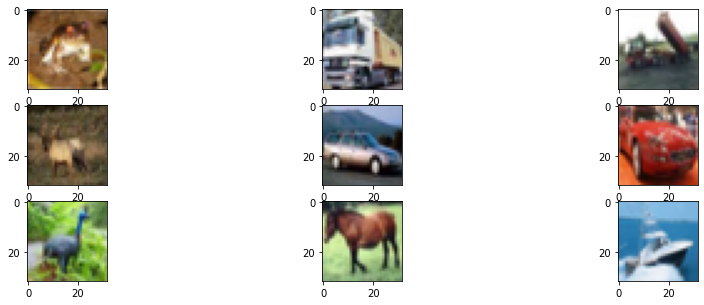

In [18]:
from matplotlib import pyplot

dataset_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Dataset classes number setting to 10
num_classes=10

#Sample Data
print('Sample images and labels from training dataset: ' + str([x[0] for x in y_train[0:9]])) 

print('Classes for the labels: ' + str([dataset_classes[x[0]] for x in y_train[0:9]]))

#Plotting them as matrix from matrix format
f, axarr = plt.subplots(1, 10)
f.set_size_inches(15, 5)

for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(X_train[i])
#display matrix
pyplot.show()

In [19]:

# Google Drive mounted to sample images for final testing of the model
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Normalization
First making the data to float type since it is in integers initially and this step helps us in normalizing the data.

In [20]:
# Changing the data type to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the data with max pixel value
X_train = X_train / 255.0
X_test = X_test / 255.0


**One hot encoding**

I have imported the np_utils function from Keras, as it contains to_categorical() which is used to one hot encode the data.

One hot encoding makes our training data more useful and expressive, and it can be rescaled easily.

to_categorical() --> Converts a class vector (integers) to binary class matrix.

In [21]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

class_num = y_test.shape[1]
print(class_num)

10


In [22]:
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


Using the Sequential mode that is imported from keras.
We have applied the convolutional layer. 
We have to specify the number of filters which is 32 in below code an the size of the filters that is 3 * 3 for below code and the activation function 'relu'.

The Keras Conv2D parameter, filters determines the number of kernels to convolve with the input volume.

Max pooling is then used to reduce the spatial dimensions of the output volume.

As we increase the number of convolutional layers, we are adding more filters and the model can understand the complex representations.

In [23]:
num_classes = 10

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(32, 32, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Model summary gives the Trainable and Non-trainable features along with layer and shape information

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 64)        

## Model Compilation
### Categorical_crossentropy
categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels

### Optimizer
Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

### Metrics
A metric is a function that is used to judge the performance of your model here we are using for Accuracy.

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
# epochs set as 10 for model fitting
epochs = 10

# Fitting the model with training and validation data with batch size as 32
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 6.5276 - accuracy: 0.0999 - val_loss: 6.4295 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 6.4447 - accuracy: 0.1000 - val_loss: 6.4295 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 6.4447 - accuracy: 0.1000 - val_loss: 6.4295 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 6.4447 - accuracy: 0.1000 - val_loss: 6.4295 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 6.4447 - accuracy: 0.1000 - val_loss: 6.4295 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 6.4447 - accuracy: 0.1000 - val_loss: 6.4295 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 6.4447 - accuracy: 0.1000 - val_loss: 6.4295 - val_ac

Visualize the results by create plots of loss and accuracy on the training and validation sets.

We can see from the results the training and validation accuracy and loss respectively are off by huge margin making the model not fit.

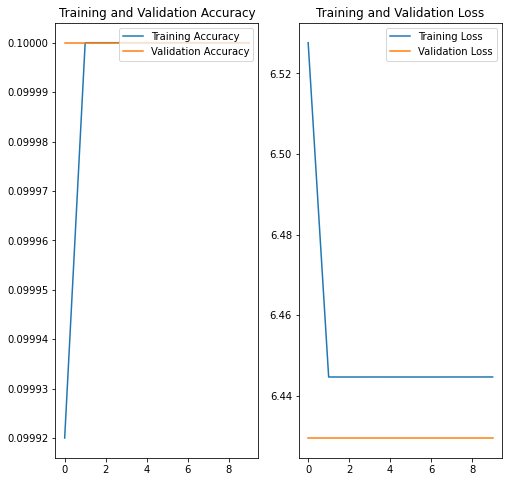

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

# Accuracy Mapping
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

# Loss Mapping
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Here, We have added another dense layer into the model with 'softmax' activation function.

Softmax is a mathematical function that converts a vector of numbers into a vector of probabilities, where the probabilities of each value are proportional to the relative scale of each value in the vector.

In [28]:
num_classes = 10

# Model Design
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(32, 32, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 4, 64)        

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 10
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4340 - accuracy: 0.4797 - val_loss: 1.0959 - val_accuracy: 0.6054
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0266 - accuracy: 0.6375 - val_loss: 0.9632 - val_accuracy: 0.6625
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8672 - accuracy: 0.6944 - val_loss: 0.8936 - val_accuracy: 0.6899
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7633 - accuracy: 0.7325 - val_loss: 0.8217 - val_accuracy: 0.7120
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6822 - accuracy: 0.7619 - val_loss: 0.8849 - val_accuracy: 0.6948
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6200 - accuracy: 0.7828 - val_loss: 0.8104 - val_accuracy: 0.7290
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5621 - accuracy: 0.8015 - val_loss: 0.8138 - val_ac

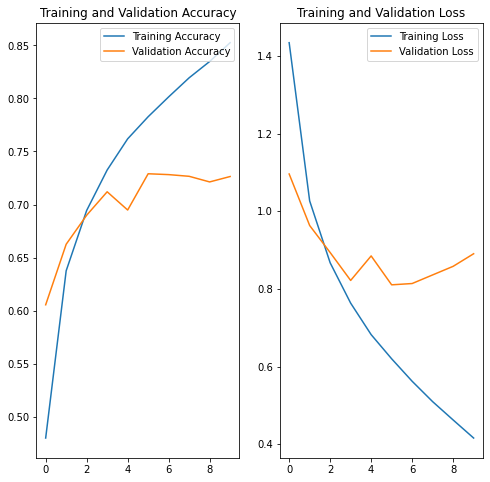

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

# Accuracy Mapping
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

# Loss Mapping
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Adding a dropout layer into the model**

To reduce overfitting I have used Dropout layer, a form of regularization. 

When we apply Dropout to a layer it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. 

In [31]:
num_classes = 10
# Model Design
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(32, 32, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax'),
  layers.Dropout(0.2)
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 64)        

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 10
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)


Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 4.2668 - accuracy: 0.4107 - val_loss: 1.2436 - val_accuracy: 0.5677
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 4.0167 - accuracy: 0.5250 - val_loss: 1.0170 - val_accuracy: 0.6414
Epoch 3/10
1563/1563 [==============================] - 13s 9ms/step - loss: 3.8843 - accuracy: 0.5638 - val_loss: 0.9694 - val_accuracy: 0.6609
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 3.8078 - accuracy: 0.5891 - val_loss: 0.9080 - val_accuracy: 0.6845
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 3.7970 - accuracy: 0.6033 - val_loss: 0.8398 - val_accuracy: 0.7094
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 3.7171 - accuracy: 0.6218 - val_loss: 0.8594 - val_accuracy: 0.7044
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 3.7442 - accuracy: 0.6299 - val_loss: 0.8827 - val_ac

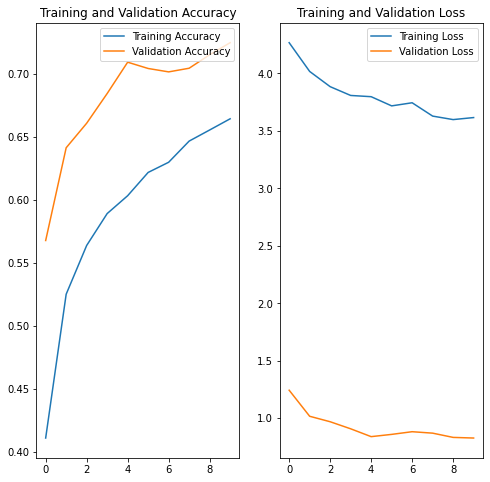

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

# Accuracy Mapping
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

# Loss Mapping
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Adding more dense layers with droupout after each maxpooling

In [34]:
# Model Design

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=X_train.shape[1:]),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(num_classes, activation='softmax')
])

Here, we are using RMSprop optimizer.

RMSprop uses a moving average of squared gradients to normalize the gradient itself. 

That has an effect of balancing the step size in decreasing the step for large gradient to avoid exploding, and increase the step for small gradient to avoid vanishing.

In [35]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer= keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6), 
    metrics=['accuracy'])

In [36]:
epochs = 10
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 15s 8ms/step - loss: 2.0275 - accuracy: 0.2542 - val_loss: 1.8019 - val_accuracy: 0.3688
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.7496 - accuracy: 0.3687 - val_loss: 1.6207 - val_accuracy: 0.4372
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6259 - accuracy: 0.4154 - val_loss: 1.5039 - val_accuracy: 0.4681
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5379 - accuracy: 0.4452 - val_loss: 1.4370 - val_accuracy: 0.4879
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4736 - accuracy: 0.4665 - val_loss: 1.3724 - val_accuracy: 0.5161
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4126 - accuracy: 0.4912 - val_loss: 1.3045 - val_accuracy: 0.5384
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3655 - accuracy: 0.5092 - val_loss: 1.2670 - val_ac

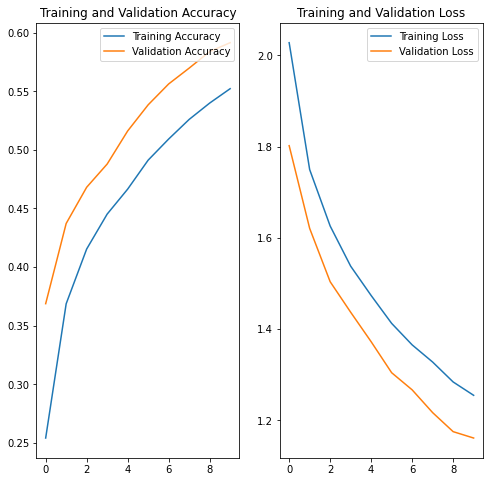

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

# Accuracy Mapping
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

# Loss Mapping
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Increasing the number of epochs to 75 using the same model parameters

In [38]:
epochs = 75
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Epoch 1/75
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2250 - accuracy: 0.5645 - val_loss: 1.1221 - val_accuracy: 0.6071
Epoch 2/75
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1979 - accuracy: 0.5728 - val_loss: 1.1127 - val_accuracy: 0.6070
Epoch 3/75
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1713 - accuracy: 0.5842 - val_loss: 1.1127 - val_accuracy: 0.6060
Epoch 4/75
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1505 - accuracy: 0.5929 - val_loss: 1.0539 - val_accuracy: 0.6279
Epoch 5/75
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1318 - accuracy: 0.6000 - val_loss: 1.0334 - val_accuracy: 0.6356
Epoch 6/75
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1160 - accuracy: 0.6056 - val_loss: 1.0607 - val_accuracy: 0.6239
Epoch 7/75
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0956 - accuracy: 0.6117 - val_loss: 1.0169 - val_ac

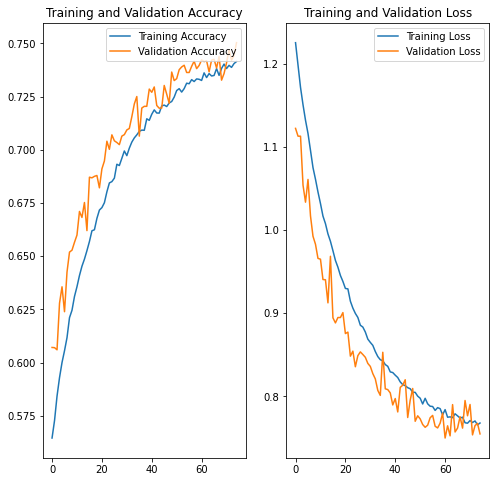

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

# Accuracy Mapping
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

# Loss Mapping
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Model Summary with all hyperparamters and completing full training and validation

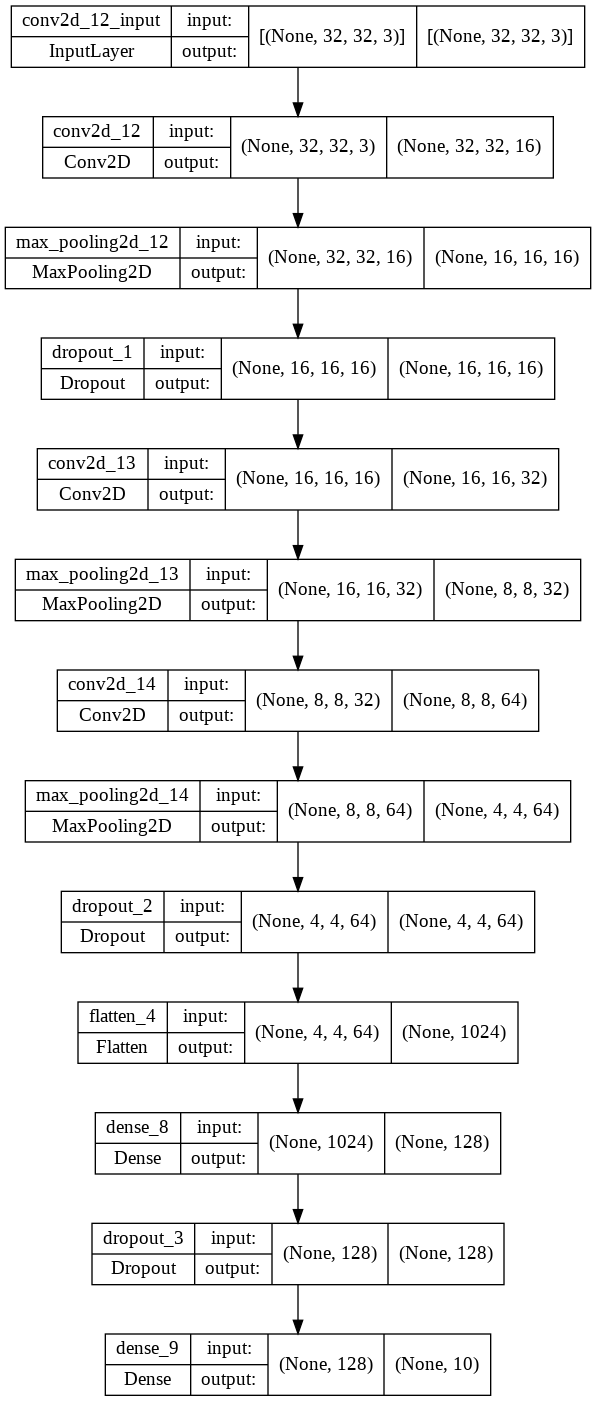

In [40]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [74]:
# Prediction
y_pred_raw = model.predict(X_test)
y_pred = np.argmax(y_pred_raw, axis=1)
y_true = np.argmax(y_test, axis = 1)


Accuracy, F1 Score and ROC-AUC score 

In [75]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_auc_score, auc, roc_curve
#Print classification report
# test_accuracy = model.evaluate(X_val)*100
print(f"Test accuracy is {np.mean(y_true == y_pred)}%")

print("Confusion Matrix")
print(confusion_matrix(y_true,y_pred ))
print('F1 score is',f1_score(y_true,y_pred, average = 'weighted') *100, "%")

predicted_probab =model.predict(X_test)
print("ROC- AUC score is", roc_auc_score( y_test, predicted_probab)*100)

Test accuracy is 0.7503%
Confusion Matrix
[[772  21  49  15  19   8  11   6  58  41]
 [ 17 873   3   5   3   3  10   1  24  61]
 [ 60   4 648  30  79  62  72  23   8  14]
 [ 15  15  76 467  72 197  90  37  17  14]
 [ 12   2  58  42 728  33  63  47  14   1]
 [  9   4  52 115  54 683  30  39   7   7]
 [  5   8  40  30  22  16 872   3   2   2]
 [ 11   3  37  18  63  62  12 780   4  10]
 [ 45  34  16  11   8   6   6   2 856  16]
 [ 26  88   4  10   4   4   8   6  26 824]]
F1 score is 74.73458011884834 %
ROC- AUC score is 96.51307222222222


In [43]:
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

In [44]:
dataset_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Loading the image by placing the image to drive and mounting the drive to colab and placing the path here for airplane images.

n1 = image.imread('/content/drive/MyDrive/images/airplane-1.jfif')   
n2 = image.imread('/content/drive/MyDrive/images/airplane-2.jfif')   
n3 = image.imread('/content/drive/MyDrive/images/airplane-3.jfif')   
n4 = image.imread('/content/drive/MyDrive/images/airplane-4.jfif')   
n5 = image.imread('/content/drive/MyDrive/images/airplane-5.jpg')   

#Normalising the image and resizing it match the shape of our model to input.

n1 = n1 / 255.0 
n2 = n2 / 255.0 
n3 = n3 / 255.0 
n4 = n4 / 255.0 
n5 = n5 / 255.0 

image_resized_1 = resize(n1, (32,32,3),) 
image_resized_2 = resize(n2, (32,32,3),) 
image_resized_3 = resize(n3, (32,32,3),) 
image_resized_4 = resize(n4, (32,32,3),) 
image_resized_5 = resize(n5, (32,32,3),) 

m1 = np.expand_dims(image_resized_1, axis=0)   
m2 = np.expand_dims(image_resized_2, axis=0)   
m3 = np.expand_dims(image_resized_3, axis=0)   
m4 = np.expand_dims(image_resized_4, axis=0)   
m5 = np.expand_dims(image_resized_5, axis=0)   

ship


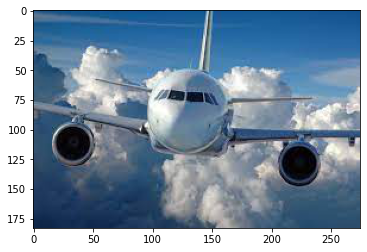

In [45]:
# Making prediction and printing the label

plt.imshow(n1)
keypoints1 = model.predict(m1)  
print(dataset_classes[np.argmax(keypoints1)])

airplane


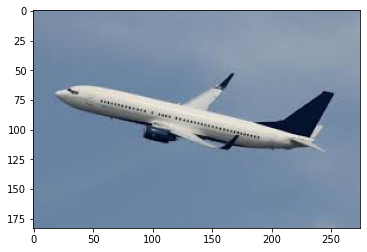

In [46]:
# Making prediction and printing the label

plt.imshow(n2)
keypoints2 = model.predict(m2)  
print(dataset_classes[np.argmax(keypoints2)]) 

ship


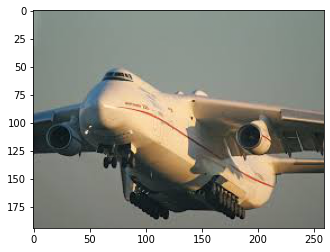

In [47]:
# Making prediction and printing the label

plt.imshow(n3)
keypoints3 = model.predict(m3)  
print(dataset_classes[np.argmax(keypoints3)]) 

bird


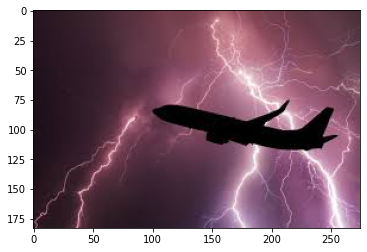

In [48]:
# Making prediction and printing the label

plt.imshow(n4)
keypoints4 = model.predict(m4)  
print(dataset_classes[np.argmax(keypoints4)])

airplane


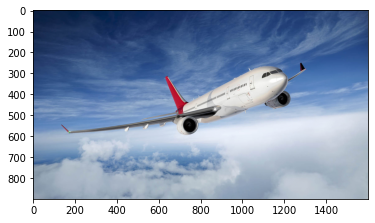

In [49]:
# Making prediction and printing the label

plt.imshow(n5)
keypoints5 = model.predict(m5)  
print(dataset_classes[np.argmax(keypoints5)]) 

In [50]:
# Loading the image by placing the image to drive and mounting the drive to colab and placing the path here for Bird images.

n1 = image.imread('/content/drive/MyDrive/images/bird-1.jfif')   
n2 = image.imread('/content/drive/MyDrive/images/bird-2.jfif')   
n3 = image.imread('/content/drive/MyDrive/images/bird-3.jfif')   
n4 = image.imread('/content/drive/MyDrive/images/bird-4.jfif')   
n5 = image.imread('/content/drive/MyDrive/images/bird-5.jfif')   

#Normalising the image and resizing it match the shape of our model to input.

n1 = n1 / 255.0 
n2 = n2 / 255.0 
n3 = n3 / 255.0 
n4 = n4 / 255.0 
n5 = n5 / 255.0 

image_resized_1 = resize(n1, (32,32,3),) 
image_resized_2 = resize(n2, (32,32,3),) 
image_resized_3 = resize(n3, (32,32,3),) 
image_resized_4 = resize(n4, (32,32,3),) 
image_resized_5 = resize(n5, (32,32,3),) 

m1 = np.expand_dims(image_resized_1, axis=0)   
m2 = np.expand_dims(image_resized_2, axis=0)   
m3 = np.expand_dims(image_resized_3, axis=0)   
m4 = np.expand_dims(image_resized_4, axis=0)   
m5 = np.expand_dims(image_resized_5, axis=0)  

bird


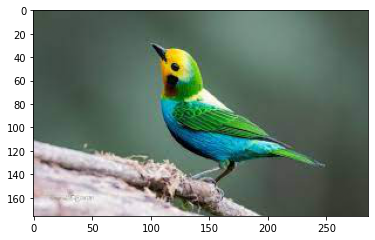

In [51]:
# Making prediction and printing the label
plt.imshow(n1)
keypoints1 = model.predict(m1)  
print(dataset_classes[np.argmax(keypoints1)])

bird


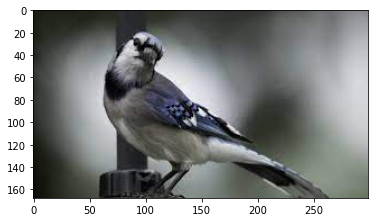

In [52]:
# Making prediction and printing the label
plt.imshow(n2)
keypoints2 = model.predict(m2)  
print(dataset_classes[np.argmax(keypoints2)])

bird


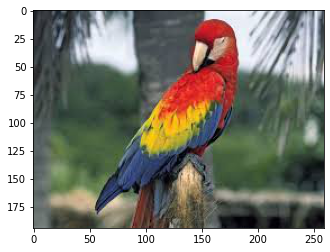

In [53]:
# Making prediction and printing the label
plt.imshow(n3)
keypoints3 = model.predict(m3)  
print(dataset_classes[np.argmax(keypoints3)])

deer


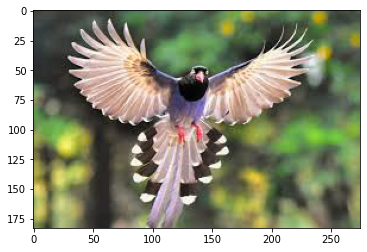

In [54]:
# Making prediction and printing the label
plt.imshow(n4)
keypoints4 = model.predict(m4)  
print(dataset_classes[np.argmax(keypoints4)])

dog


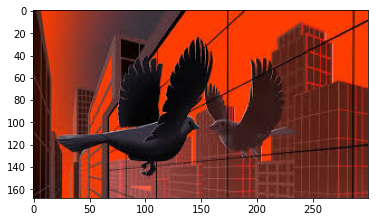

In [55]:
# Making prediction and printing the label
plt.imshow(n5)
keypoints5 = model.predict(m5)  
print(dataset_classes[np.argmax(keypoints5)])

In [56]:
#Here loading the image by placing the image to drive and mounting the drive to colab and placing the path here cat images.
n1 = image.imread('/content/drive/MyDrive/images/cat-1.jfif')   
n2 = image.imread('/content/drive/MyDrive/images/cat-2.jfif')   
n3 = image.imread('/content/drive/MyDrive/images/cat-3.jfif')   
n4 = image.imread('/content/drive/MyDrive/images/cat-4.jfif')   
n5 = image.imread('/content/drive/MyDrive/images/cat-5.jfif')   
#Normalising the image and resizing it match the shape of our model to input.

n1 = n1 / 255.0 
n2 = n2 / 255.0 
n3 = n3 / 255.0 
n4 = n4 / 255.0 
n5 = n5 / 255.0 

image_resized_1 = resize(n1, (32,32,3),) 
image_resized_2 = resize(n2, (32,32,3),) 
image_resized_3 = resize(n3, (32,32,3),) 
image_resized_4 = resize(n4, (32,32,3),) 
image_resized_5 = resize(n5, (32,32,3),) 

m1 = np.expand_dims(image_resized_1, axis=0)   
m2 = np.expand_dims(image_resized_2, axis=0)   
m3 = np.expand_dims(image_resized_3, axis=0)   
m4 = np.expand_dims(image_resized_4, axis=0)   
m5 = np.expand_dims(image_resized_5, axis=0)  

cat


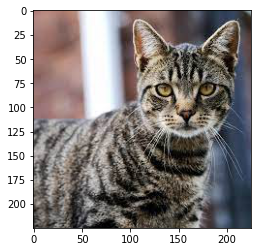

In [57]:
# Making prediction and printing the label
plt.imshow(n1)
keypoints1 = model.predict(m1)  
print(dataset_classes[np.argmax(keypoints1)])

cat


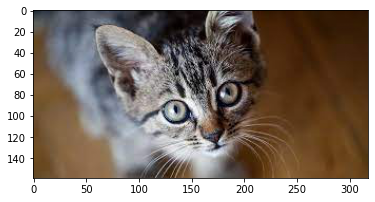

In [58]:
# Making prediction and printing the label
plt.imshow(n2)
keypoints2 = model.predict(m2)  
print(dataset_classes[np.argmax(keypoints2)])

cat


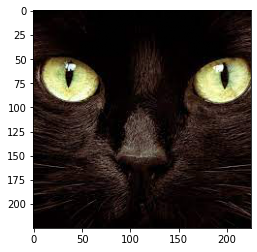

In [59]:
# Making prediction and printing the label
plt.imshow(n3)
keypoints3 = model.predict(m3)  
print(dataset_classes[np.argmax(keypoints3)])

cat


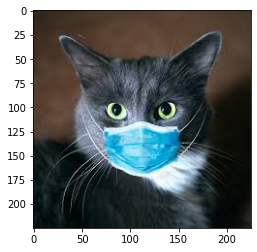

In [60]:
# Making prediction and printing the label
plt.imshow(n4)
keypoints4 = model.predict(m4)  
print(dataset_classes[np.argmax(keypoints4)])

bird


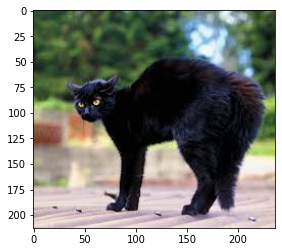

In [61]:
# Making prediction and printing the label
plt.imshow(n5)
keypoints5 = model.predict(m5)  
print(dataset_classes[np.argmax(keypoints5)])

In [62]:
#Here loading the image by placing the image to drive and mounting the drive to colab and placing the path here dog images.
n1 = image.imread('/content/drive/MyDrive/images/dog-1.jfif')   
n2 = image.imread('/content/drive/MyDrive/images/dog-2.jfif')   
n3 = image.imread('/content/drive/MyDrive/images/dofg-3.jfif')   
n4 = image.imread('/content/drive/MyDrive/images/dog-4.jfif')   
n5 = image.imread('/content/drive/MyDrive/images/dog-5.jfif')   
#Normalising the image and resizing it match the shape of our model to input. 

n1 = n1 / 255.0 
n2 = n2 / 255.0 
n3 = n3 / 255.0 
n4 = n4 / 255.0 
n5 = n5 / 255.0 

image_resized_1 = resize(n1, (32,32,3),) 
image_resized_2 = resize(n2, (32,32,3),) 
image_resized_3 = resize(n3, (32,32,3),) 
image_resized_4 = resize(n4, (32,32,3),) 
image_resized_5 = resize(n5, (32,32,3),) 

m1 = np.expand_dims(image_resized_1, axis=0)   
m2 = np.expand_dims(image_resized_2, axis=0)   
m3 = np.expand_dims(image_resized_3, axis=0)   
m4 = np.expand_dims(image_resized_4, axis=0)   
m5 = np.expand_dims(image_resized_5, axis=0)  

deer


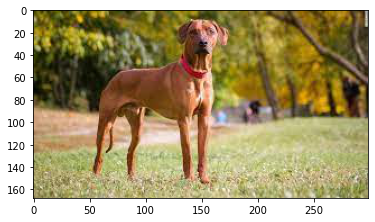

In [63]:
# Making prediction and printing the label
plt.imshow(n1)
keypoints1 = model.predict(m1)  
print(dataset_classes[np.argmax(keypoints1)])

dog


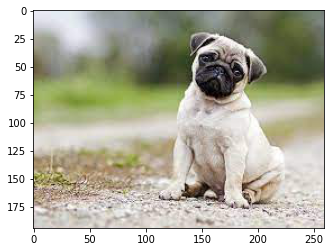

In [64]:
# Making prediction and printing the label
plt.imshow(n2)
keypoints2 = model.predict(m2)  
print(dataset_classes[np.argmax(keypoints2)])

dog


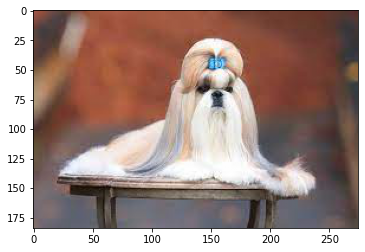

In [65]:
# Making prediction and printing the label
plt.imshow(n3)
keypoints3 = model.predict(m3)  
print(dataset_classes[np.argmax(keypoints3)])

dog


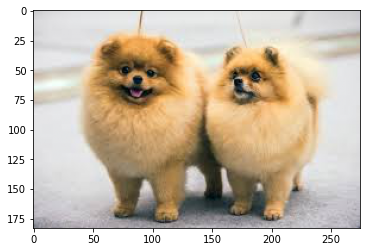

In [66]:
# Making prediction and printing the label
plt.imshow(n4)
keypoints4 = model.predict(m4)  
print(dataset_classes[np.argmax(keypoints4)])

dog


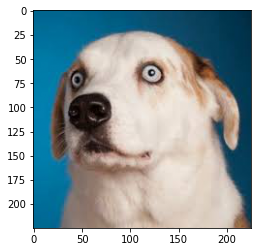

In [67]:
# Making prediction and printing the label
plt.imshow(n5)
keypoints5 = model.predict(m5)  
print(dataset_classes[np.argmax(keypoints5)])

In [68]:
#Here loading the image by placing the image to drive and mounting the drive to colab and placing the path here ship images.
n1 = image.imread('/content/drive/MyDrive/images/ship-1.jfif')   
n2 = image.imread('/content/drive/MyDrive/images/ship-2.jfif')   
n3 = image.imread('/content/drive/MyDrive/images/ship-3.jfif')   
n4 = image.imread('/content/drive/MyDrive/images/ship-4.jfif')   
n5 = image.imread('/content/drive/MyDrive/images/ship-5.jfif')   
#Normalising the image and resizing it match the shape of our model to input.

n1 = n1 / 255.0 
n2 = n2 / 255.0 
n3 = n3 / 255.0 
n4 = n4 / 255.0 
n5 = n5 / 255.0 

image_resized_1 = resize(n1, (32,32,3),) 
image_resized_2 = resize(n2, (32,32,3),) 
image_resized_3 = resize(n3, (32,32,3),) 
image_resized_4 = resize(n4, (32,32,3),) 
image_resized_5 = resize(n5, (32,32,3),) 

m1 = np.expand_dims(image_resized_1, axis=0)   
m2 = np.expand_dims(image_resized_2, axis=0)   
m3 = np.expand_dims(image_resized_3, axis=0)   
m4 = np.expand_dims(image_resized_4, axis=0)   
m5 = np.expand_dims(image_resized_5, axis=0)  

ship


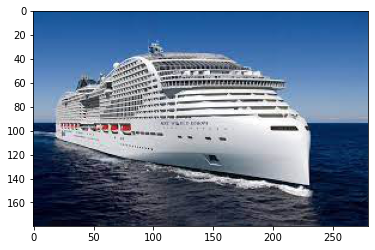

In [69]:
# Making prediction and printing the label
plt.imshow(n1)
keypoints1 = model.predict(m1)  
print(dataset_classes[np.argmax(keypoints1)])

cat


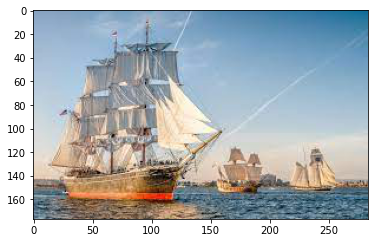

In [70]:
# Making prediction and printing the label
plt.imshow(n2)
keypoints2 = model.predict(m2)  
print(dataset_classes[np.argmax(keypoints2)])

ship


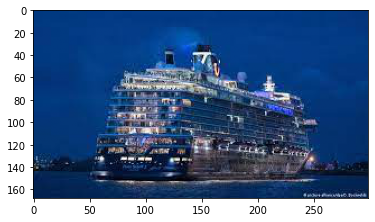

In [71]:
# Making prediction and printing the label
plt.imshow(n3)
keypoints3 = model.predict(m3)  
print(dataset_classes[np.argmax(keypoints3)])

ship


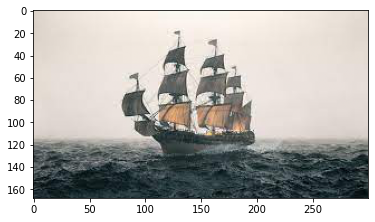

In [72]:
# Making prediction and printing the label
plt.imshow(n4)
keypoints4 = model.predict(m4)  
print(dataset_classes[np.argmax(keypoints4)])

ship


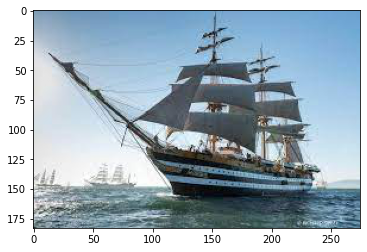

In [73]:
# Making prediction and printing the label
plt.imshow(n5)
keypoints5 = model.predict(m5)  
print(dataset_classes[np.argmax(keypoints5)])